## Métodos de Classificação




In [0]:
#importaçoes
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NBA dataset/regularseason19.csv')

columns_short = ['FGM', 'FGA', 'FG_PCT','FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB','REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
df_select = df[columns_short]
# df_select.head()
# df_select.shape

### Selecionando X e Y, e dando split nos dados

In [0]:
X = df_select
y_encoded, y_categories = df.WL.factorize()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=192)



In [0]:
#Verificando o tamanho o tamanho bate 80% 20%
print('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (1547, 17)
X_test: numero de linhas e colunas: (387, 17)
y_train: numero de linhas e colunas: (1547,)
y_test: numero de linhas e colunas: (387,)


In [0]:
def comparasion_metrics_calculator(y_train, y_predict):
    precisao  = precision_score(y_train, y_predict)
    auc_score = roc_auc_score(y_train, y_predict)
    revocacao = recall_score(y_train, y_predict)
    f1  = f1_score(y_train, y_predict) 
    print('precisao:{}'.format(precisao))
    print('revocacao:{}'.format(revocacao))
    print('AUC:{}'.format(auc_score))
    print('F1:{}'.format(f1))


 ## Treinando Um Classificador Binário

 ### SGD classifier :

 Este classificador tem a vantagem de consegui lidar eficientemente com conjuntos de dados mt grande. *Adequado para aprendizado online

In [0]:

sgd_clf = SGDClassifier(random_state=192)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=192, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
elemento = 42
some_element = X.iloc[elemento].values
some_element_resp = y_encoded[elemento]
print('Prediçao: {}'.format(sgd_clf.predict([some_element])))
print('Resposta: {}'.format(some_element_resp))


Prediçao: [0]
Resposta: 0


### Mediçã da acurácia com a utilização da validação cruzada


In [0]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.71317829, 0.62790698, 0.66601942])

### Matriz de confusão


In [0]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [0]:
confusion_matrix(y_train, y_train_pred)
#Cade linha representa uma classe real
#Cada coluna uma classe prevista
#                classe NEGATIVA | CLASSE POSITIVA
#----------------|---------------|----------------|
#REAL NEGATIVA   |               |                |
#----------------|---------------|----------------|
#REAL POSITIVA   |               |                |
#----------------|---------------|----------------|

array([[566, 212],
       [300, 469]])

### PREVISÃO REVOCAÇÃO



In [0]:
precisao  = precision_score(y_train, y_train_pred)
revocacao = recall_score(y_train, y_train_pred)

print('precisao:{}'.format(precisao))
print('revocacao:{}'.format(revocacao))


precisao:0.6886930983847284
revocacao:0.6098829648894668


### Pontuação F1

Métrica simples para comparara dois classificadores diferentes.
É a média hármonica da precisão e revocação



In [0]:
f1_score = f1_score(y_train, y_train_pred)

print('Métrica F1: {}'.format(f1_score))

Métrica F1: 0.646896551724138


### Ajuste de limite para o algoritmo SDG


o SGDClassifier utiliza o limiar igual a zero

Para decidir qual utilizar limiar utilizar, primeiro é necessario obter as pontuações de todas a instâncias no conjunto de treinamento. Especificando que a função retorne as pontuações das decisões ao invés das precisões.

In [0]:
#Pontuação de todas decisões
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function')

In [0]:


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [0]:
def plot_precision_recall_vc_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16,9))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    # plt.ylim([0,1])

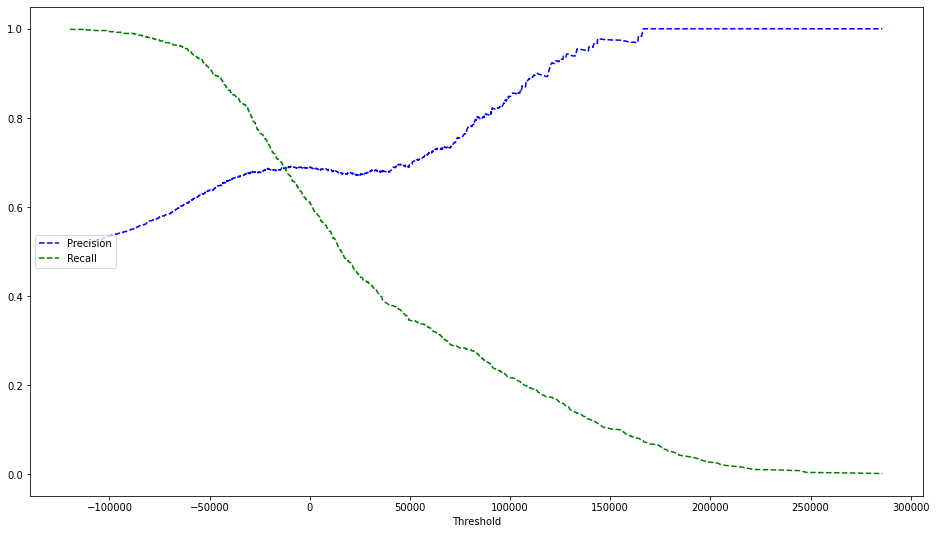

In [0]:
plot_precision_recall_vc_threshold(precisions, recalls, thresholds)
plt.show()

In [0]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=thresholds,
                        y=precisions[:-1],
                        name='Precisão'))
fig.add_trace(go.Scatter(x=thresholds,
                        y=recalls[:-1],
                        name='Revocação'))


### A curva ROC
Ferramenta utilizada em classificadores binários. Muito semelhante à curva de precisão/Revocação, mas, em vez de plotar a precisão versus a revocação, a curva ROC plota a **taxa de verdadeiros positivos(TPR)versus a taxa de falsos positos(FPR).**

Portanto a curva ROC plota a sensibilidade versus especificidade

In [0]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


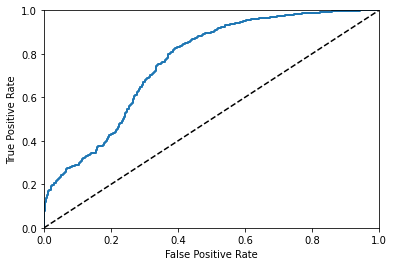

In [0]:
plot_roc_curve(fpr, tpr)

Uma maneira de comprar classificadores é medir a área abaixo da curva. Um classificador perfgeito terá um ROC igual a 1, enquanto um classificador puramente aleatorio terá um igual a 0.5

**Para calcular o scikit-learn fornece uma função**

In [0]:

roc_auc_score(y_train, y_scores)

0.7614519574381311

### RandomForest Classifier


In [0]:

forest_clf = RandomForestClassifier(random_state=192)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=10, method='predict_proba')

In [0]:
forest_clf.fit(X_train, y_train)
feature_importances = forest_clf.feature_importances_


,0
0,0.088977
1,0.051941
2,0.123565
3,0.038763
4,0.036060
5,0.067905
6,0.048519
7,0.042534
8,0.044027
9,0.031565


KeyError: ignored

In [0]:
y_scores_forest = y_probas_forest[:,1] # Probabilidades das classes positivas *O retorno do classificador da random forest é diferente
fpr_forest, tpr_forest, thesholds_forest = roc_curve(y_train, y_scores_forest)

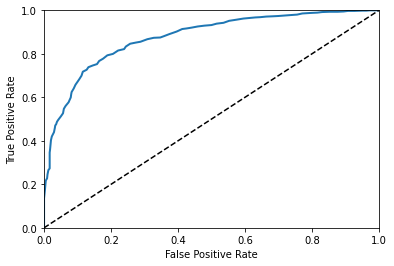

In [0]:
# plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'RANDOM FOREST')
plt.show()

In [0]:
# y_probas_forest[:50]

y_pred_forest = []
for iterator in range(len(y_probas_forest)):
    if y_probas_forest[iterator][0] >= y_probas_forest[iterator][1]:
        y_pred_forest.append(0)
    else:
        y_pred_forest.append(1)

In [0]:
comparasion_metrics_calculator(y_train, y_pred_forest)

precisao:0.8217270194986073
revocacao:0.7672301690507152
AUC:0.8013528737284425
F1:0.7935440484196368


### SVM Classifier non linear


In [0]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=192, kernel='poly')
cross_val_score(svm_clf, X_train, y_train, cv=10 ,scoring='accuracy')

array([0.69677419, 0.7483871 , 0.74193548, 0.74193548, 0.70322581,
       0.69677419, 0.70322581, 0.70779221, 0.71428571, 0.68831169])

In [0]:
y_predict_svm = cross_val_predict(svm_clf, X_train, y_train, cv = 10)
roc_auc_score(y_train, y_predict_svm)

0.7137344930985722

In [0]:
comparasion_metrics_calculator(y_train, y_predict_svm)

precisao:0.8
revocacao:0.7698309492847855
AUC:0.7137344930985722
F1:0.6829268292682926
